In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, shapiro, levene, kruskal, chi2_contingency, pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot

In [93]:
df=pd.read_csv('data.csv')

# Business Problem
- The company wants to identify which variables play significant roles in predicting the demand for shared electric cycles in the market. By determining the key variables influencing demand, the company can prioritize resources and strategic initiatives to optimize their business operations and meet customer needs effectively.
- Additionally, the company aims to evaluate how well these identified variables describe the demand for electric cycles. Understanding the descriptive power of these variables will provide insights into the factors driving consumer behavior and preferences in the market, enabling the company to tailor its offerings and marketing strategies accordingly.

In [94]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df.shape

(10886, 12)

There are 10886 rows and 12 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Column Analysis:
- datetime: Date and Time (datetime needs to in datetime format)
- season: Season as in 1: spring, 2: summer, 3: fall, 4: winter
- holiday: Whether day is a holiday or not (0 or 1)
- workingday: If day is neither weekend nor holiday is 1, otherwise is 0
- weather:<br>
1: Clear, Few clouds, partly cloudy, partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
- temp: Temperature in Celsius
- atemp: Feeling temperature in Celsius
- humidity: Humidity
- windspeed: Wind speed
- casual: Count of casual users
- registered: Count of registered users
- count: Count of total rental bikes including both casual and registered

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


- Date and Time: 
	- The dataset spans from January 1, 2011, to December 19, 2012 with 1 hr interval.
	- 50th percentile for datetime suggests it's around January 1st, 2012, 20:30.
	- The 75th percentile for datetime indicates it's likely early summer (July).
- Temperature: 
	- The average temperature is around 20.23°C, with a standard deviation of 7.79°C, indicating some variability in temperature.
	- The minimum temperature is 0.82°C, and the maximum is 41°C.
	- 25% of the time, the temperature is below 13.94°C, and 75% of the time, it's below 26.24°C.
- Humidity:
	- The average humidity is about 61.89%, with a standard deviation of 19.25%, suggesting moderate variability.
	- The minimum humidity is 0%, which seems like an anomaly. The maximum humidity is 100%.
	- 25% of the time, the humidity is below 47%, and 75% of the time, it's below 77%.
- Count of Rental Bikes:
	- The mean count of bike rentals is 191.57, with a standard deviation of 181.14, indicating a wide range of rental counts in the dataset.
	- There's a minimum count of 1 bike rental and a maximum of 977 rentals.
	- 25% of the rentals have a count below 42, and 75% have a count below 284.
- Wind Speed: 
	- Wind speed ranges from 0 to 56.99.
	- Average windspeed is approximately 12.8.
- Season: 
	- Average season is around 2.5, which would approximately indicate the transition between spring and summer.
	- The 25th percentile for the season indicates it's likely early summer (June).
- Holidays: 
	- Very few holidays on average (mean holiday value is close to zero).
- Working Day: 
	- Around 68% of the days are working days.
- Weather: 
	- The average weather condition is around 1.4, indicating generally clear weather.
- Count of Casual and Registered:
	- There are about 155 casual bike rentals and 191 registered bike rentals on average.
- Notably, the standard deviation for registered and casual rentals is quite high, indicating significant variability in rental patterns.

In [8]:
#Extracting only date
df['date']=df['datetime'].dt.strftime('%Y-%m-%d')

In [9]:
df['date'].nunique()

456

Even though dataset spans from January 1, 2011, to December 19, 2012 which gives a total of 718 days but upon checking we can see that only 456 days are there in the data set. 

In [10]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
dtype: int64

There are no null value in the dataset

In [11]:
df.duplicated().sum()

0

There are no duplicated rows in the dataset

**Categorial Columns:** <br>
season, holiday, workingday, weather<br>

**Numerical Columns:** <br>
temp, atemp, humidity, windspeed, casual, registered, count<br>

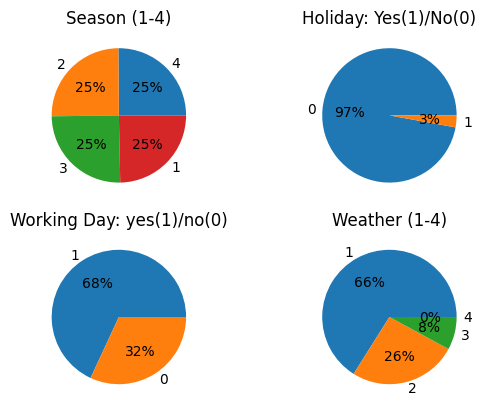

In [12]:
plt.subplot(2,2,1)
plt.pie(df.season.value_counts(), labels=df.season.value_counts().index, autopct='%.0f%%')
plt.title('Season (1-4)')
plt.subplot(2,2,2)
plt.pie(df.holiday.value_counts(), labels=df.holiday.value_counts().index, autopct='%.0f%%')
plt.title('Holiday: Yes(1)/No(0)')
plt.subplot(2,2,3)
plt.pie(df.workingday.value_counts(), labels=df.workingday.value_counts().index, autopct='%.0f%%')
plt.title('Working Day: yes(1)/no(0)')
plt.subplot(2,2,4)
plt.pie(df.weather.value_counts(), labels=df.weather.value_counts().index, autopct='%.0f%%')
plt.title('Weather (1-4)');

In [13]:
df.season.value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [14]:
df.holiday.value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [15]:
df.workingday.value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [16]:
df.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

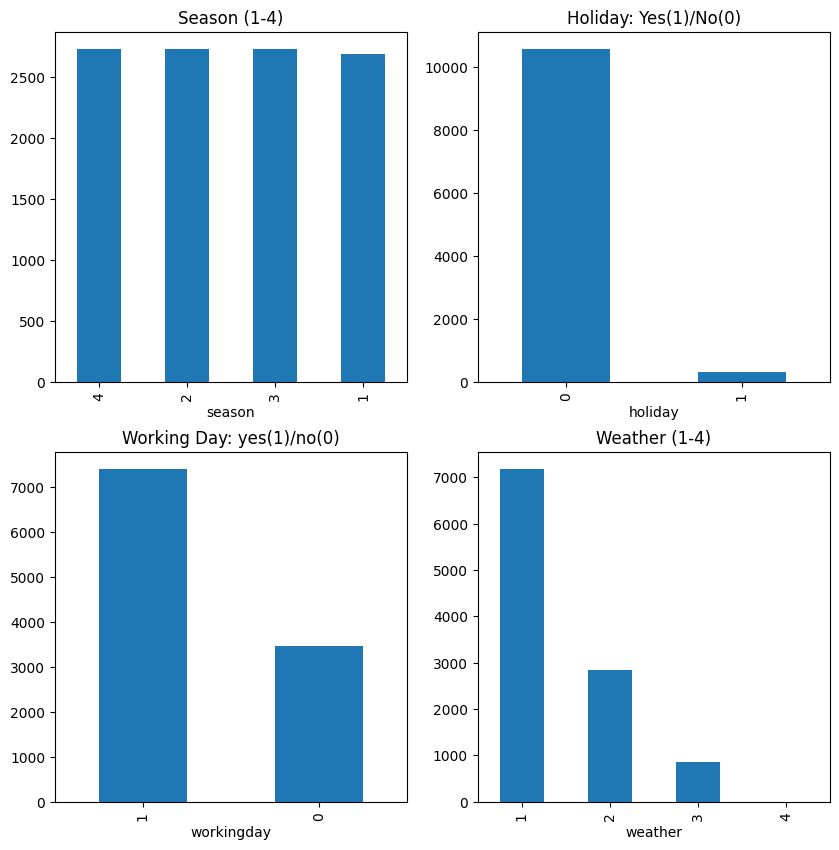

In [17]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
df.season.value_counts().plot(kind='bar')
plt.title('Season (1-4)')
plt.subplot(2,2,2)
df.holiday.value_counts().plot(kind='bar')
plt.title('Holiday: Yes(1)/No(0)')
plt.subplot(2,2,3)
df.workingday.value_counts().plot(kind='bar')
plt.title('Working Day: yes(1)/no(0)')
plt.subplot(2,2,4)
df.weather.value_counts().plot(kind='bar')
plt.title('Weather (1-4)');

#### Insight and Analysis:
- **Season:** It seems that data collection might have been fairly balanced across seasons, except for Season 1, which has slightly fewer instances compared to the others. This could be due to various reasons such as data collection biases, seasonality of the activity being recorded, or simply chance.
- **Holiday:** The dataset is heavily skewed towards non-holiday days. This is because the data span is of 2 years and naturally count of holidays and non-holidays will differ where holidays are very less.
- **Workingday:** Similar to the holiday variable, there's an imbalance in the data with more instances of working days compared to non-working days. This suggests that the dataset might not be equally representative of both types of days, which could skew any analysis or predictions made using this data.
- **Weather:** Most of the data appears to come from days with relatively clear or mist weather conditions (categories 1 and 2). There are very few instances of extreme weather conditions (categories 3 and 4), which could indicate either a bias in data collection towards good weather days or simply the rarity of extreme weather like snowing events depending on the time period covered by the dataset.

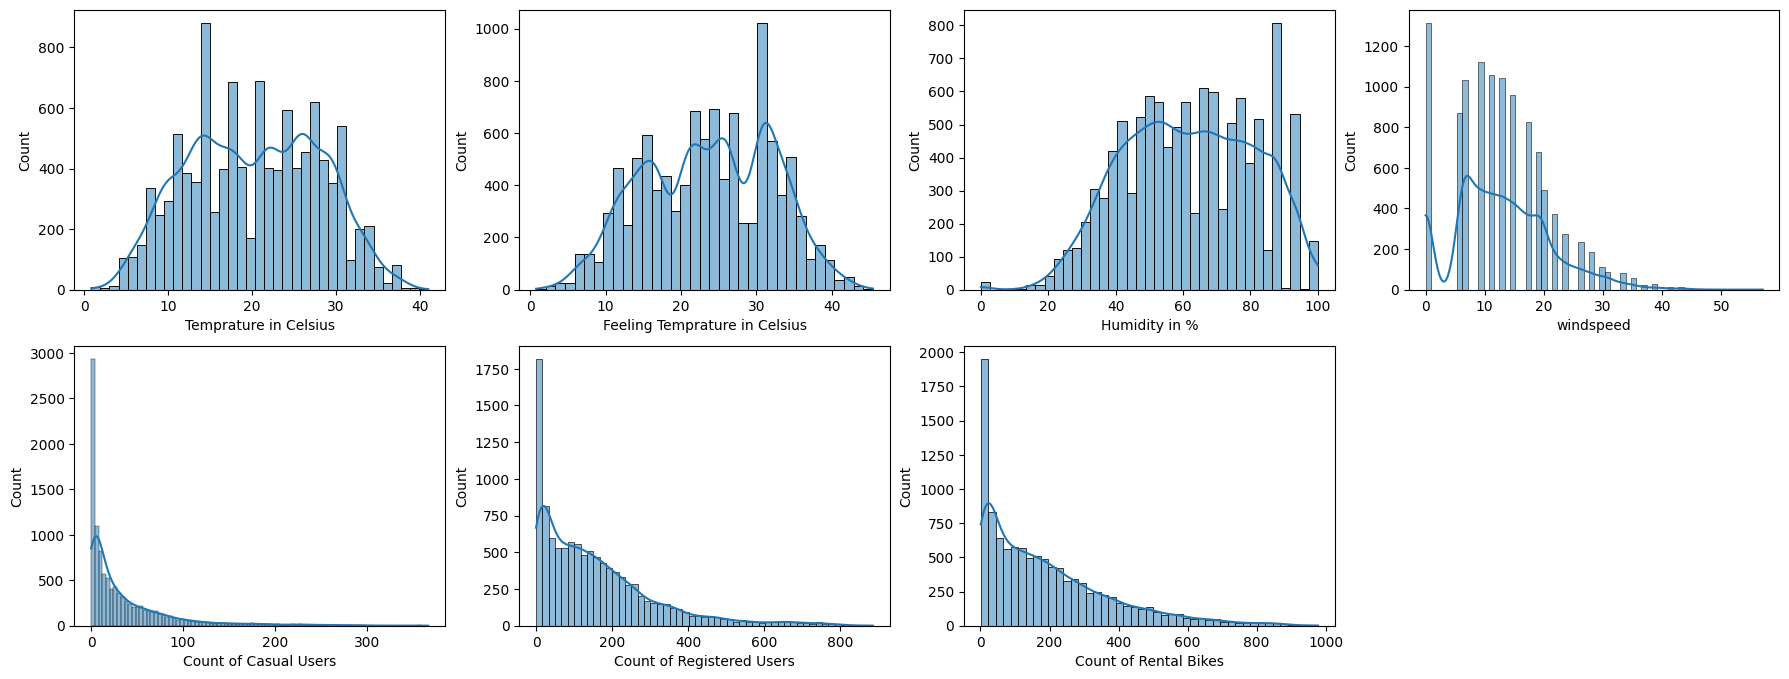

In [18]:
plt.figure(figsize=(22,8))
plt.subplot(2, 4, 1)
sns.histplot(df.temp, kde=True)
plt.xlabel('Temprature in Celsius')
plt.subplot(2, 4, 2)
sns.histplot(df.atemp, kde=True)
plt.xlabel('Feeling Temprature in Celsius')
plt.subplot(2, 4, 3)
sns.histplot(df.humidity, kde=True)
plt.xlabel('Humidity in %')
plt.subplot(2, 4, 4)
sns.histplot(df.windspeed, kde=True)
plt.subplot(2, 4, 5)
sns.histplot(df.casual, kde=True)
plt.xlabel('Count of Casual Users')
plt.subplot(2, 4, 6)
sns.histplot(df.registered, kde=True)
plt.xlabel('Count of Registered Users')
plt.subplot(2, 4, 7)
sns.histplot(df['count'], kde=True)
plt.xlabel('Count of Rental Bikes');

In [19]:
df[['temp', 'atemp', 'humidity','windspeed', 'casual', 'registered', 'count']].skew()

temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

#### Insight and Analysis:
- **Temperature and Feeling Temperature:** Both temperature and feeling temperature exhibit a bimodal distribution, suggesting peak bike rentals occur around 20 and 30 degrees Celsius, indicating a preference for moderate temperatures. Temperature skewness is slightly right-skewed (0.003691), indicating occasional higher temperatures. Feeling temperature skewness is slightly left-skewed (-0.102560), suggesting occasional instances of colder-than-expected conditions. <br>
*People like renting bikes when it's not too hot or too cold, but just right, with the most rentals happening around 20 and 30 degrees Celsius. Sometimes, it might feel a bit warmer than usual, and other times, it might feel cooler than expected.*
- **Humidity:** The data shows that bike rentals tend to peak when humidity levels are around 60%, suggesting people prefer renting bikes when humidity isn't too high. The negative skewness (-0.086335) indicates a slightly left-skewed distribution, implying occasional instances of lower humidity compared to the majority of data. <br>
*When humidity levels are around 60%, that's when people seem to rent bikes the most. It looks like they prefer it when it's not too humid. Sometimes, though not often, the humidity might be lower than usual, making it feel a bit drier.*
- **Wind Speed:** People prefer to rent bikes when the wind speed is low. The histogram for wind speed is right-skewed, indicating that there are several instances of relatively high wind speeds compared to the majority of the data. The positive skewness value (0.588767) confirms the right-skewed distribution of wind speed, emphasizing the prevalence of higher wind speeds in the dataset. <br>
*It means that most people like to rent bikes when there isn't much wind. But looking at the data, we see that there are quite a few instances when the wind is stronger than usual, which might affect bike rentals. So, businesses or planners should consider the wind speed when predicting bike rental demand.*
- **Casual and Registered Renters:** We have right-skewed histograms for both, indicating that most users rent bikes less frequently. However, the distribution of registered users is less skewed than casual users, suggesting that registered users might rent bikes more regularly. The skewness value for casual users is very high (2.495748), indicating a heavily right-skewed distribution, suggesting occasional instances of extremely high casual bike rentals compared to the majority of the data. Similarly, the skewness value for registered users is relatively high (1.524805), indicating a heavily right-skewed distribution, suggesting occasional instances of extremely high registered bike rentals compared to the majority of the data. <br>
*Most people rent bikes less often. There are a few instances where people rent a lot of bikes, but most of the time, they rent fewer. Registered users tend to rent bikes more regularly than casual users. For both casual and registered users, there are a few instances where people rent a ton of bikes, much more than usual. This could be during special events or unusual circumstances.*
- **Count of Rental Bikes**: The skewness value for the count of rental bikes is relatively high (1.242066), indicating a heavily right-skewed distribution. This suggests that most of the time, bike rentals are moderate, but occasionally there are instances of extremely high rentals, which skew the overall distribution to the right meaning, *These "super busy" days make the overall pattern of bike rentals lean towards the right side, making it look like there are more rentals than there actually are on most days.*

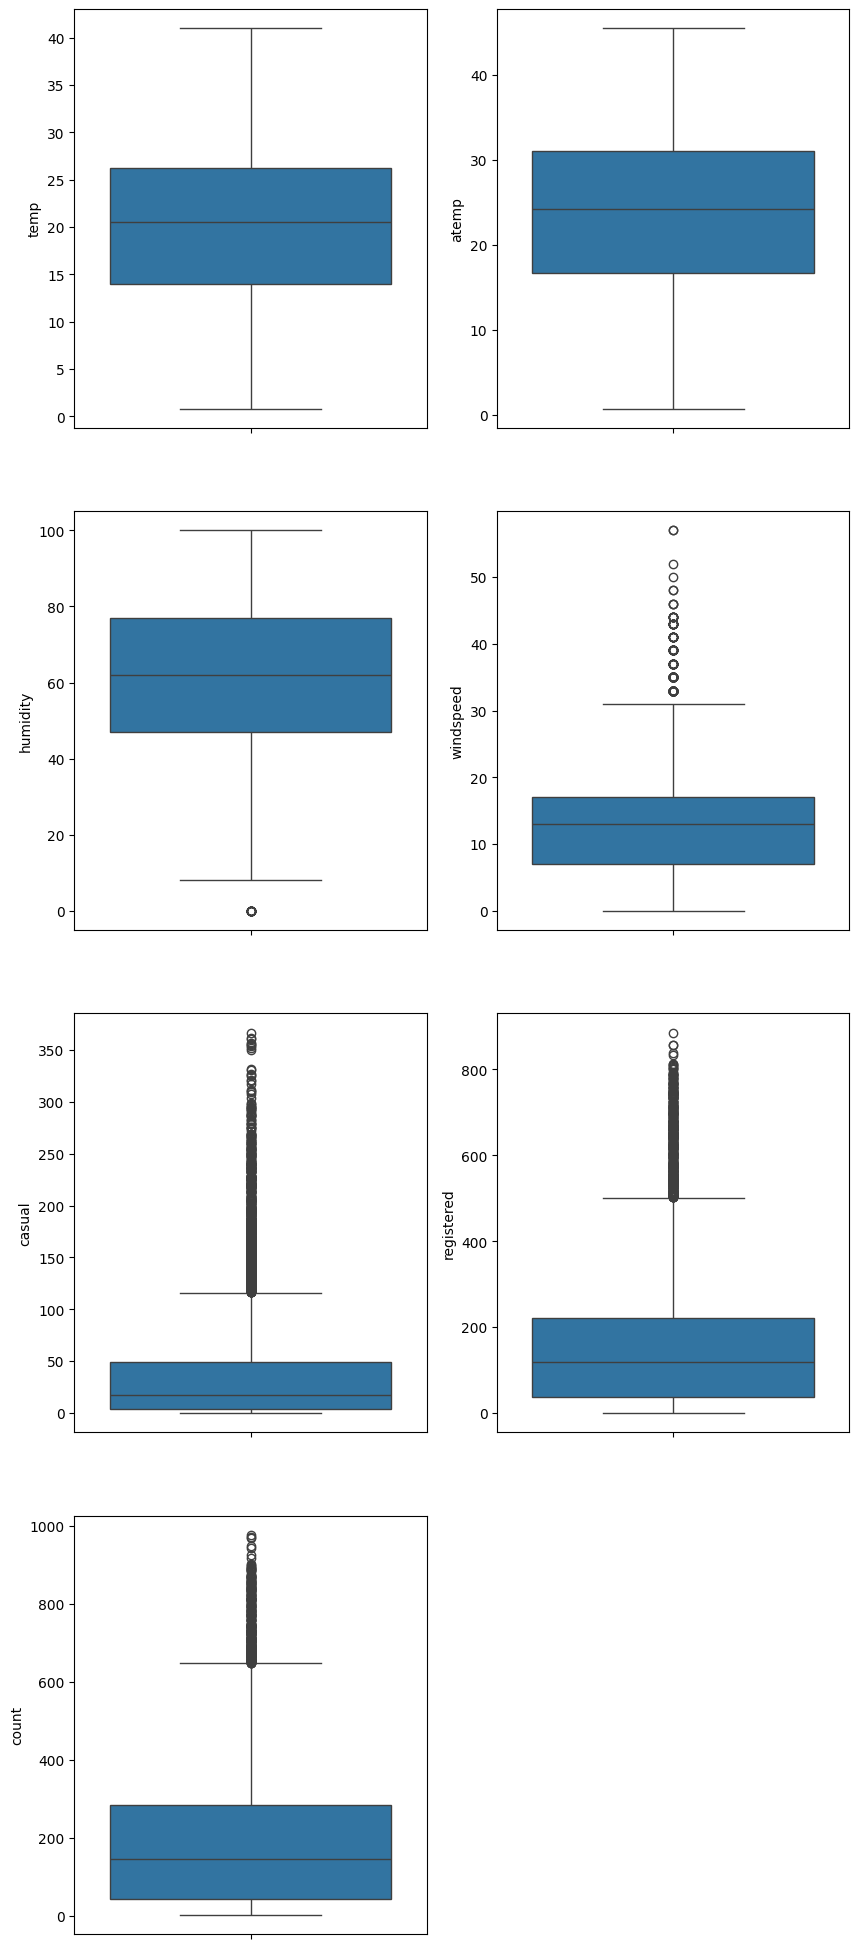

In [20]:
plt.figure(figsize=(10, 25))
plt.subplot(4,2,1)
sns.boxplot(df.temp)
plt.subplot(4,2,2)
sns.boxplot(df.atemp)
plt.subplot(4,2,3)
sns.boxplot(df.humidity)
plt.subplot(4,2,4)
sns.boxplot(df.windspeed)
plt.subplot(4,2,5)
sns.boxplot(df.casual)
plt.subplot(4,2,6)
sns.boxplot(df.registered)
plt.subplot(4,2,7)
sns.boxplot(df['count']);

We can notice that there are Outliners in columns = humidity, windspeed, casual, registered, count

In [21]:
iqr=df.humidity.quantile(0.75)-df.humidity.quantile(0.25)

In [22]:
df.humidity.quantile(0.25)-1.5*iqr, df.humidity.quantile(0.75)+1.5*iqr

(2.0, 122.0)

In [23]:
df[(df.humidity<2) | (df.humidity>122)].count()

datetime      22
season        22
holiday       22
workingday    22
weather       22
temp          22
atemp         22
humidity      22
windspeed     22
casual        22
registered    22
count         22
date          22
dtype: int64

In [24]:
df.shape

(10886, 13)

In [25]:
#% of data which are outliner in Humidity
22*100/10886

0.20209443321697593

We can drop these as it will not affect the data much.

In [26]:
df=df[(df.humidity>2) & (df.humidity<122)]
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19


In [27]:
iqr=df.windspeed.quantile(0.75)-df.windspeed.quantile(0.25)
df.windspeed.quantile(0.25)-1.5*iqr, df.windspeed.quantile(0.75)+1.5*iqr

(-7.993100000000002, 31.992500000000003)

In [28]:
df[(df.windspeed<-7.993100000000002) | (df.windspeed>31.992500000000003)].count()

datetime      226
season        226
holiday       226
workingday    226
weather       226
temp          226
atemp         226
humidity      226
windspeed     226
casual        226
registered    226
count         226
date          226
dtype: int64

In [29]:
226*100/10864

2.0802650957290134

We can dropped the data

In [30]:
df=df[(df.windspeed>-7.993100000000002) & (df.windspeed<31.992500000000003)]
df.shape

(10638, 13)

In [31]:
iqr=df.casual.quantile(0.75)-df.casual.quantile(0.25)
df.casual.quantile(0.25)-1.5*iqr, df.casual.quantile(0.75)+1.5*iqr

(-63.5, 116.5)

In [32]:
df[(df.casual<-63.5) | (df.casual>116.5)].shape

(737, 13)

In [33]:
df[(df.casual<-63.5) | (df.casual>116.5)].shape[0]*100/df.shape[0]

6.927993983831548

It is still less than 10% so we can drop it.

In [34]:
df=df[(df.casual>-63.5) & (df.casual<116.5)]
df.shape

(9901, 13)

In [35]:
iqr=df.registered.quantile(0.75)-df.registered.quantile(0.25)
df.registered.quantile(0.25)-1.5*iqr, df.registered.quantile(0.75)+1.5*iqr

(-225.5, 458.5)

In [36]:
df[(df.registered<-225.5) | (df.registered>458.5)].shape

(518, 13)

In [37]:
df[(df.registered<-225.5) | (df.registered>458.5)].shape[0]*100/df.shape[0]

5.231794768205232

In [38]:
df=df[(df.registered>-225.5) & (df.registered<458.5)]
df.shape

(9383, 13)

In [39]:
iqr=df['count'].quantile(0.75)-df['count'].quantile(0.25)
df['count'].quantile(0.25)-1.5*iqr, df['count'].quantile(0.75)+1.5*iqr

(-256.5, 515.5)

In [40]:
df[(df['count']<-256.5) | (df['count']>515.5)].shape

(19, 13)

In [41]:
df[(df['count']<-256.5) | (df['count']>515.5)].shape[0]*100/df.shape[0]

0.20249387189598209

In [42]:
df=df[(df['count']>-256.5) & (df['count']<515.5)]
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


In [43]:
#% of rows that has been dropped due to Outliner treatment using IQR method 
(10886-9364)*100/10886

13.981260334374426

In [44]:
df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.986274,-0.001420,-0.020075,0.508347,0.265161,0.337470
atemp,0.986274,1.000000,0.016066,-0.061997,0.501727,0.262679,0.333909
humidity,-0.001420,0.016066,1.000000,-0.300993,-0.327826,-0.264690,-0.298090
windspeed,-0.020075,-0.061997,-0.300993,1.000000,0.108759,0.107581,0.115870
casual,0.508347,0.501727,-0.327826,0.108759,1.000000,0.582157,0.715850
registered,0.265161,0.262679,-0.264690,0.107581,0.582157,1.000000,0.984471
count,0.337470,0.333909,-0.298090,0.115870,0.715850,0.984471,1.000000


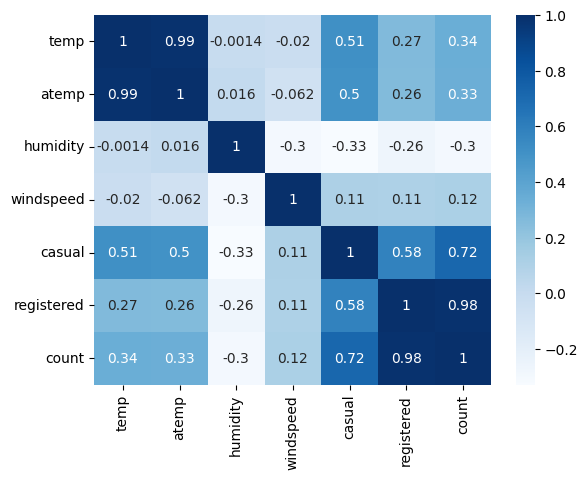

In [45]:
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(), cmap='Blues', annot=True);

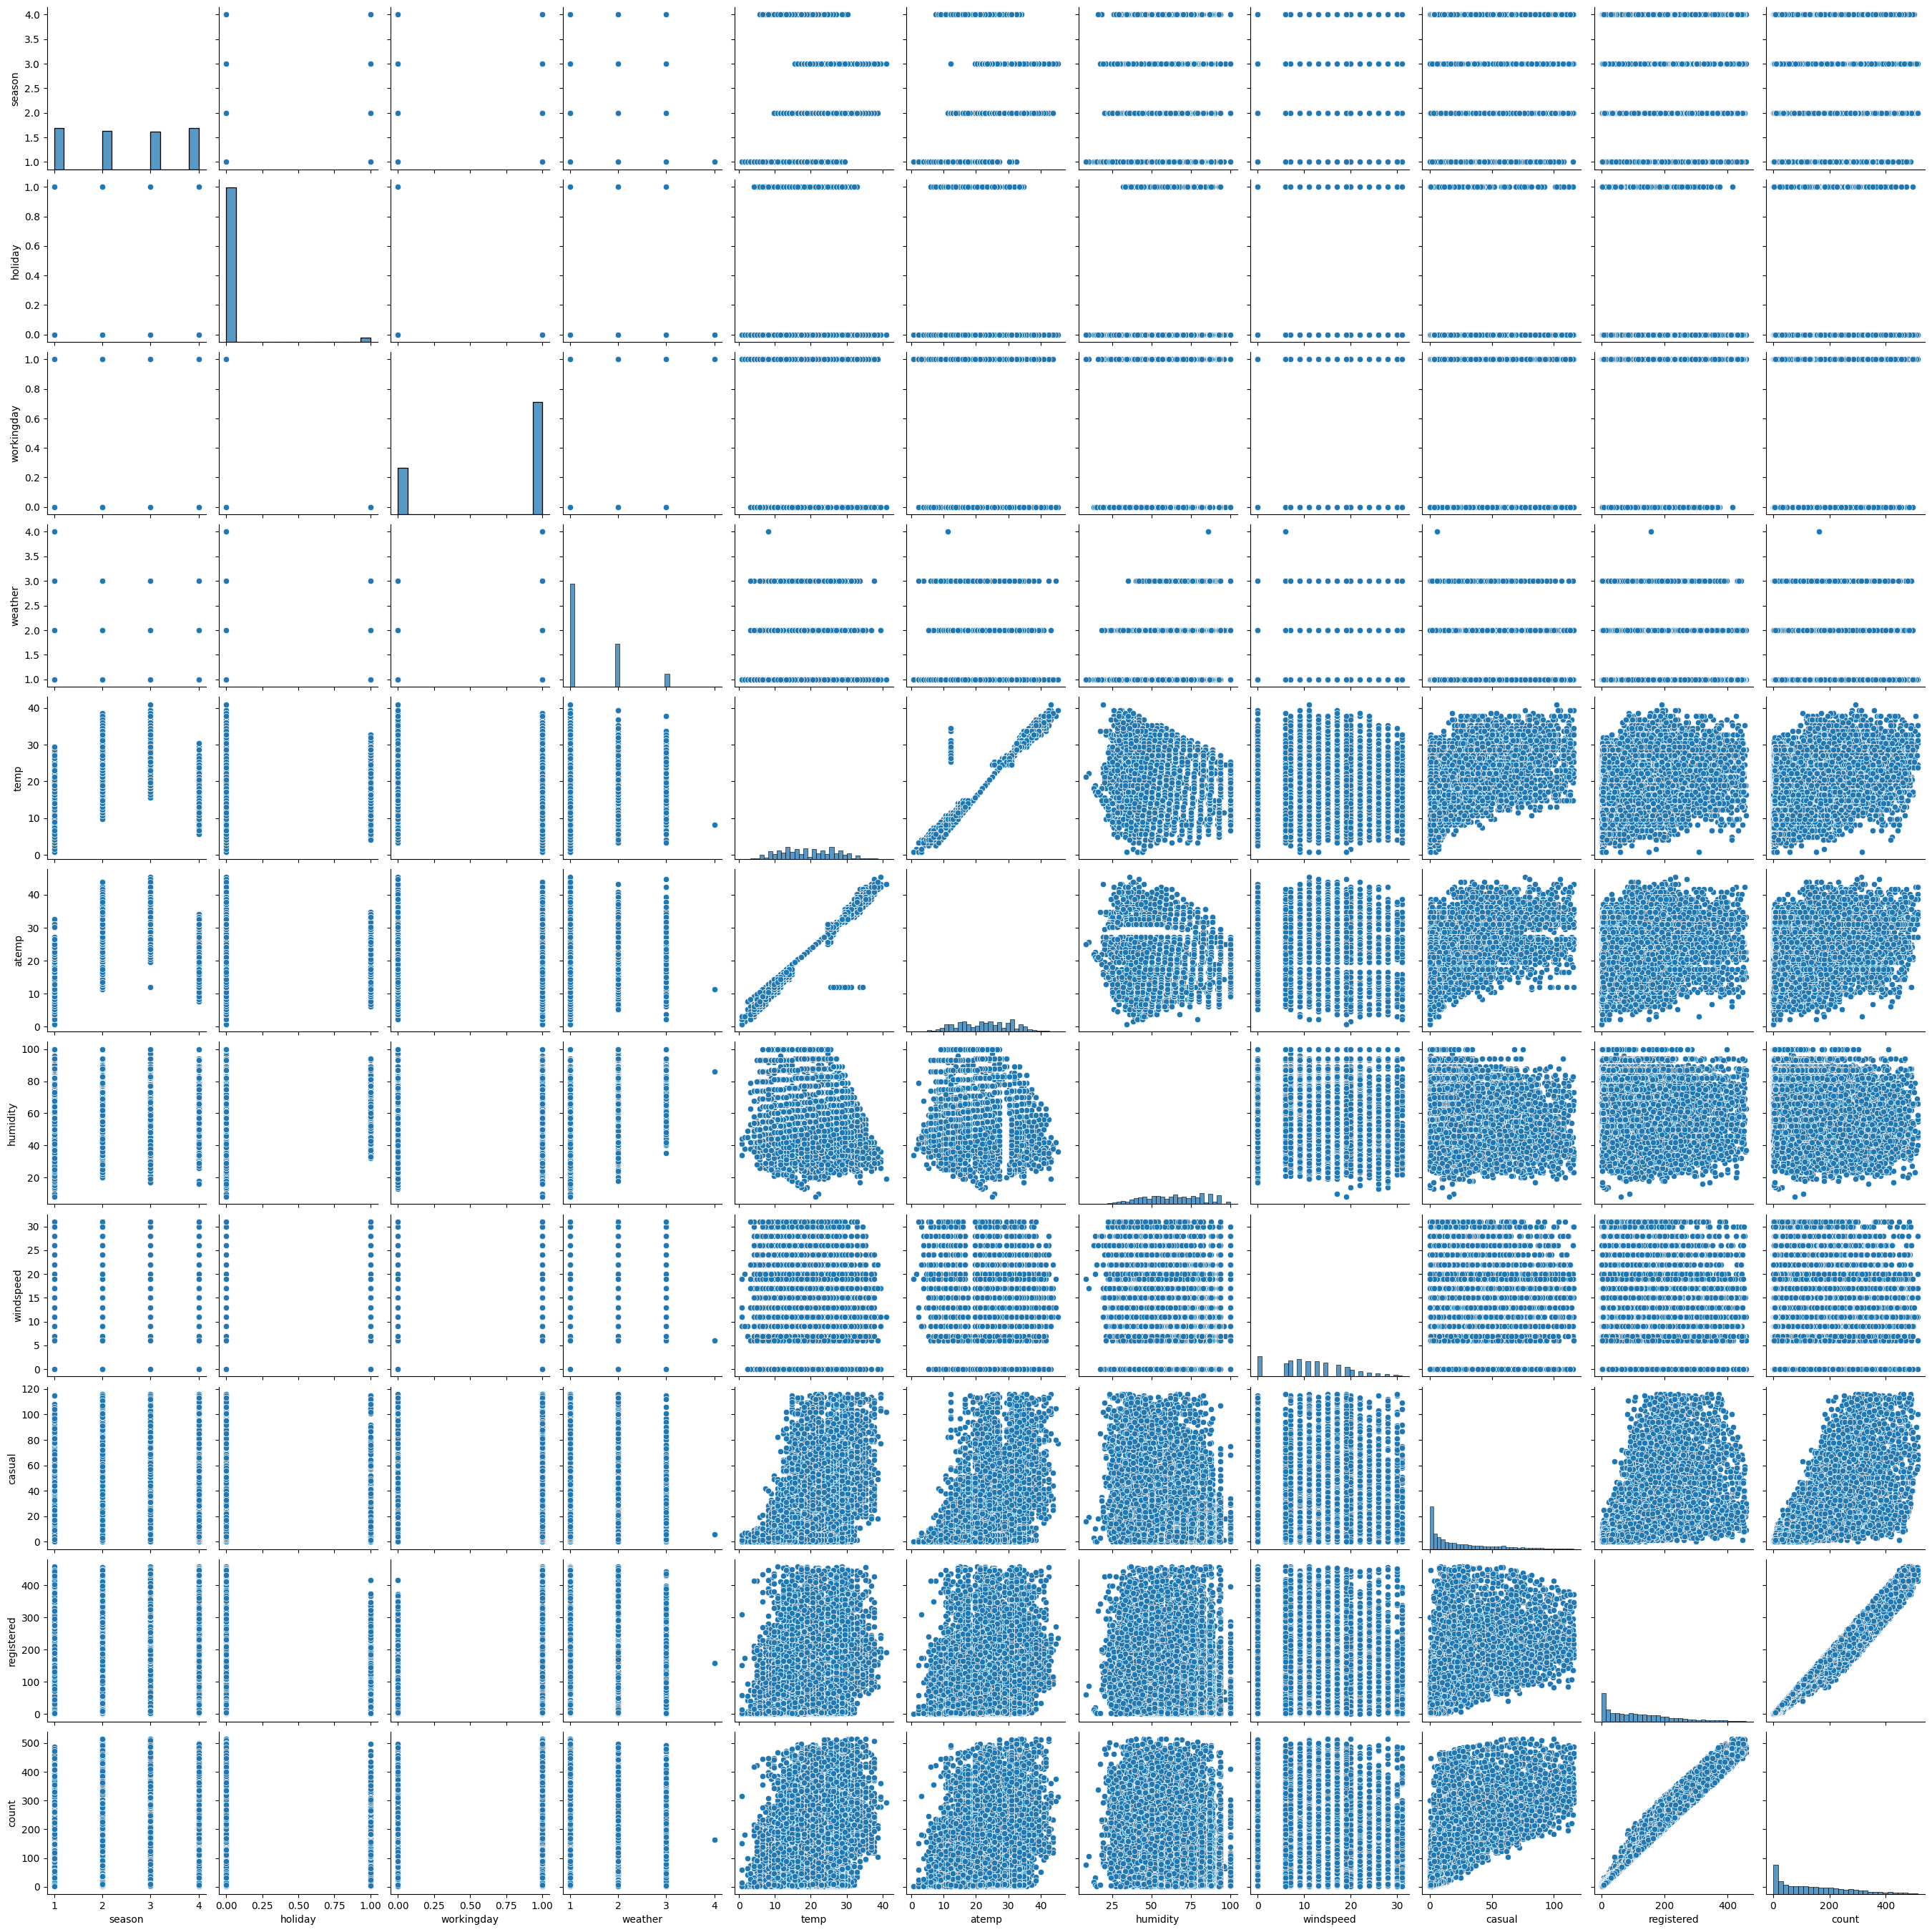

In [46]:
sns.pairplot(df);

#### Insight and Analysis:
- **Temperature:**
    - There's a moderate positive correlation between temperature and both casual users and feeling temperature. This implies that as temperature increases, the number of casual users and feeling temperature also tends to increase.
    - The correlation between temperature and the count of rented bikes is also positive but weaker compared to the correlation with casual users. This suggests that temperature might influence the number of bike rentals, but not as strongly as it influences casual users directly.
- **Casual Users:**
    - Casual users have a moderate positive correlation with both temperature and feeling temperature. This indicates that warmer weather and higher feeling temperatures tend to attract more casual users to rent bikes.
    - There's a negative correlation between humidity and casual users. This suggests that as humidity increases, the number of casual users decreases. This might imply that uncomfortable weather conditions deter casual users from renting bikes.
- **Registered Users:**
    - Feeling temperature has a weak positive correlation with registered users. This suggests that feeling warmer might have a slight influence on registered users, but it's not as pronounced as with casual users.
    - There's a weak positive correlation between windspeed and registered users. This could imply that higher windspeeds might slightly increase the number of registered users renting bikes.
- **Count of Rented Bikes:**
    - There's a moderate positive correlation between temperature and the count of rented bikes, indicating that warmer weather generally leads to more bike rentals.
    - Feeling temperature also has a positive correlation with the count of rented bikes, but it's weaker compared to the correlation with temperature.
    - Both humidity and windspeed have negative correlations with the count of rented bikes, though the correlations are relatively weak. This suggests that higher humidity and windspeeds might slightly decrease the number of bike rentals.

<br>*Overall, these correlations suggest that temperature, feeling temperature, humidity, and windspeed all play roles in influencing the number of bike rentals and the behavior of both casual and registered users. Warmer and more comfortable weather tends to attract more users, while adverse weather conditions like high humidity and windspeed might deter users from renting bikes. However, the relationships are not overly strong, indicating that other factors not included in this analysis might also be influencing bike rental patterns.*

## Checking if there is any significant difference between the no. of bike rides on Weekdays and Weekends?

Creating a new column for Weekdays and Weekend purpose.

In [47]:
#The day of the week with Monday=0, Sunday=6
df['Weekend']= df['datetime'].dt.dayofweek.apply(lambda x: 1 if x > 4 else 0)

In [48]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,Weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1


In [49]:
df.Weekend.value_counts()

Weekend
0    6891
1    2473
Name: count, dtype: int64

In [50]:
ride_weekdays=df[df.Weekend==0]['count']
ride_weekdays

47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 6891, dtype: int64

In [51]:
ride_weekdends=df[df.Weekend==1]['count']
ride_weekdends

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 2473, dtype: int64

**Null Hypothesis (H0):** <br>
There is no significant difference between the number of bike rides on weekdays and weekends. <br>
**Alternate Hypothesis for Two-sided (H1):** <br>
There is a significant difference between the number of bike rides on weekdays and weekends. <br>
**Alternate Hypothesis for Right-Tailed (H1):** <br>
There is a significant difference between the number of bike rides on weekdays and weekends. Where Weekdays has more number of bike rides <br>
**Alternate Hypothesis for Left-Tailed (H1):** <br>
There is a significant difference between the number of bike rides on weekdays and weekends. Where Weekends has more number of bike rides <br>

In [52]:
#Two sided 2 sample t-test
tstat, pvalue=ttest_ind(ride_weekdays, ride_weekdends)
tstat, pvalue

(11.69620464564846, 2.202207703298455e-31)

In [53]:
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. There is a significant difference between the number of bike rides on weekdays and weekends.')
else:
    print('Failed to Reject null hypothesis. There is no significant difference between the number of bike rides on weekdays and weekends.')

Reject null hypothesis. There is a significant difference between the number of bike rides on weekdays and weekends.


In [54]:
#Right-tailed 2 sample t-test
tstat, pvalue=ttest_ind(ride_weekdays, ride_weekdends, alternative='greater')
tstat, pvalue

(11.69620464564846, 1.1011038516492276e-31)

In [55]:
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. There is a significant difference between the number of bike rides on weekdays and weekends. Where Weekdays has more number of bike rides')
else:
    print('Failed to Reject null hypothesis. There is no significant difference between the number of bike rides on weekdays and weekends.')

Reject null hypothesis. There is a significant difference between the number of bike rides on weekdays and weekends. Where Weekdays has more number of bike rides


In [56]:
#Left-tailed 2 sample t-test
tstat, pvalue=ttest_ind(ride_weekdays, ride_weekdends, alternative='less')
tstat, pvalue

(11.69620464564846, 1.0)

In [57]:
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. There is a significant difference between the number of bike rides on weekdays and weekends. Where Weekends has more number of bike rides')
else:
    print('Failed to Reject null hypothesis. There is no significant difference between the number of bike rides on weekdays and weekends.')

Failed to Reject null hypothesis. There is no significant difference between the number of bike rides on weekdays and weekends.


#### Conclusion:
- **ride_weekdays, ride_weekends (two-sided):**
Rejecting the null hypothesis indicates that there is a significant difference between the number of bike rides on weekdays and weekends. However, this result does not specify whether the difference is in favor of weekdays or weekends.
- **ride_weekdays, ride_weekends (right-tailed):**
Rejecting the null hypothesis in a right-tailed test suggests that the mean number of bike rides on weekdays is significantly greater than the mean number of bike rides on weekends. This implies that weekdays tend to have more bike rides compared to weekends.
- **ride_weekdays, ride_weekends (left-tailed):**
Failing to reject the null hypothesis in a left-tailed test suggests that there is no significant evidence to conclude that the mean number of bike rides on weekdays is significantly less than the mean number of bike rides on weekends. In other words, it suggests that weekends do not have significantly fewer bike rides compared to weekdays.

## Check if the demand of bicycles on rent is the same for different Weather conditions?

In [58]:
df.weather.nunique()

4

As we can see there are 4 unique data in the Weather column means 4 groups so for testing we can use either One-Way Anova if the underline assumptions are met and if not then we can use Kruskal-Wallis Test.

Assumptions of Anova:
- Data needs to be Gaussian
- Needs to be independent
- Equal Variance in different groups

### Gaussian or Not

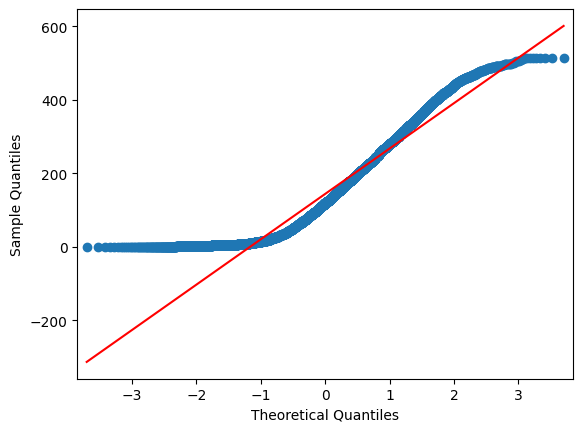

In [59]:
#Checking through Q-Q Plot
qqplot(df['count'], line='s');

As from the graph, the data needs to on red line (reference line) or close to it between -3 and +3 (standard deviation) of Theoratical Quantile as for Gaussian, 99.7% data fall on it

In [60]:
#Checking through Shapiro-Wilk Test
temp_col=df['count'].sample(150)
stat, pvalue=shapiro(temp_col)
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. Data not Gaussian')
else:
    print('Failed to Reject null hypothesis. Data is Gaussian')

Reject null hypothesis. Data not Gaussian


Via both (visual and statistical) test we can conclude that count column of dataset in not Gaussian.

### Independence:
We know the 4 weathers are independent of each other so this assumption point is met.

### Variance in groups
For this we will do the Levene test

In [61]:
df_w1=df[df.weather==1]['count']
df_w2=df[df.weather==2]['count']
df_w3=df[df.weather==3]['count']
df_w4=df[df.weather==4]['count']

In [62]:
lstat, pvalue=levene(df_w1, df_w2, df_w3, df_w4)
lstat, pvalue

(39.66315047570948, 1.841684372672214e-25)

In [63]:
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. Variances are not Equal')
else:
    print('Failed to Reject null hypothesis. Variances are Equal')

Reject null hypothesis. Variances are not Equal


As we can see that 2 assumptions for doing One-Way Anova is not met, so prefered choice is Kruskal-Wallis Test.<br>

In [64]:
#Kruskal Wallis Test
kstat, pval=kruskal(df_w1, df_w2, df_w3, df_w4)
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. Atleast one group has different Median')
else:
    print('Failed to Reject null hypothesis. All groups has same median')

Reject null hypothesis. Atleast one group has different Median


**It suggests that weather conditions have an impact on the number of bike rides.**

In [65]:
#Doing One-Way Anova just to check what it can answer.
fstat, pval=f_oneway(df_w1, df_w2, df_w3, df_w4)
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. Atleast one group has different Mean')
else:
    print('Failed to Reject null hypothesis. All groups has same mean')

Reject null hypothesis. Atleast one group has different Mean


**It suggests that weather conditions have an impact on the number of bike rides.**

As we can see both testing is pointing towards the same answer.

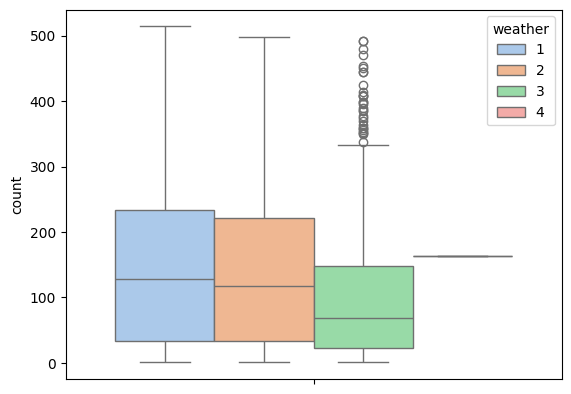

In [66]:
sns.boxplot(data=df, y='count', hue='weather', palette='pastel');

#### Insights and Analysis:
- Weather 1 and Weather 2 have the highest median bike rental counts, indicating that these weather conditions are more favorable for biking.
- Weather 3 has a lower median bike rental count compared to Weather 1 and Weather 2, but it also exhibits high outliers. This suggests that while the overall demand is lower during Weather 3, there are specific conditions within this weather category when bike rentals are unusually high, possibly during periods of scattered clouds or light rain.
- The presence of high outliers in Weather 3 indicates that there are certain conditions within this weather category where bike rentals spike unexpectedly. These outliers could be due to special events, holidays, or other factors that influence people's biking behavior during adverse weather conditions.
- Weather 4 experiences very low demand for bike rentals, indicating that these severe weather conditions deter people from biking.
#### Conclusion:
- Weather conditions significantly influence the demand for bike rentals, with clear or partly cloudy conditions (Weather 1) and misty conditions (Weather 2) being the most favorable.
- Weather 3 experiences lower overall demand for bike rentals but exhibits high outliers, indicating sporadic spikes in demand during specific conditions within this weather category.
- Weather 4 sees minimal demand for bike rentals due to severe weather conditions such as heavy rain, snow, and fog.
#### Business Recommendation:
- Company can adjust their inventory management strategies based on weather forecasts and historical rental patterns. They can ensure that they have an adequate number of bikes available during periods of high demand, such as clear or partly cloudy conditions (Weather 1), and scale back inventory during periods of low demand, such as heavy rain or snow (Weather 4).
- Offering promotions, discounts, or package deals during peak demand periods can attract more customers and increase revenue.
- Implementing flexible pricing models that adjust rates based on weather conditions and demand levels can optimize profitability.
- Tourism agencies and businesses can leverage insights into weather-related biking trends to tailor their marketing efforts and attract tourists interested in outdoor activities.

## Check if the demand of bicycles on rent is the same for different Seasons?

In [67]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,Weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1


In [68]:
#Number of seasons
df.season.nunique()

4

Due to more than 2 groups, We can use either One-Way Anova if the underline assumptions are met and if not then we can use Kruskal-Wallis Test.

Assumptions of Anova: <br>
- Data needs to be Gaussian
- Needs to be independent
- Equal Variance in different groups

### Gaussian or Not
From the previous question, we know that the count column is not Gaussian which is confirmed visually as well as statistically. <br>
#### Independence
We know the 4 Seasons are independent of each other so this assumption point is met. <br>
#### Variance in groups

In [69]:
#For this we will do the Levene test
df_s1=df[df.season==1]['count']
df_s2=df[df.season==2]['count']
df_s3=df[df.season==3]['count']
df_s4=df[df.season==4]['count']

In [70]:
lstat, pvalue=levene(df_s1, df_s2, df_s3, df_s4)
lstat, pvalue

(134.92207742468392, 1.4156739715299946e-85)

In [71]:
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. Variances are not Equal')
else:
    print('Failed to Reject null hypothesis. Variances are Equal')

Reject null hypothesis. Variances are not Equal


As we can see that 2 assumptions for doing One-Way Anova are not met, so prefered choice is Kruskal-Wallis Test.

In [72]:
#Kruskal Wallis Test
kstat, pval=kruskal(df_s1, df_s2, df_s3, df_s4)
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. Atleast one group has different Median')
else:
    print('Failed to Reject null hypothesis. All groups has same median')

Reject null hypothesis. Atleast one group has different Median


It suggests that Season have an impact on the number of bike rides.

In [73]:
#Doing One-Way Anova just to check what it can answer.
fstat, pval=f_oneway(df_s1, df_s2, df_s3, df_s4)
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. Atleast one group has different Mean')
else:
    print('Failed to Reject null hypothesis. All groups has same mean')

Reject null hypothesis. Atleast one group has different Mean


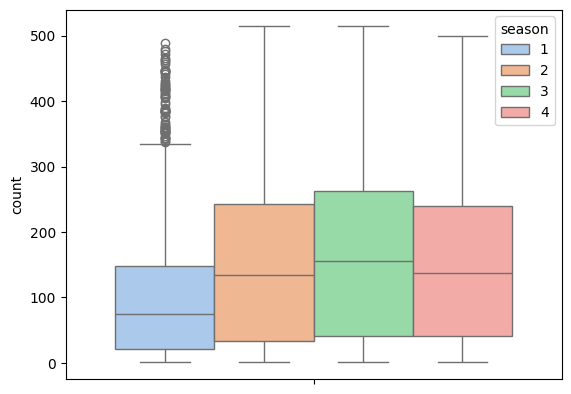

In [74]:
sns.boxplot(data=df, y='count', hue='season', palette='pastel');

#### Insights and Analysis:
- **Season 1 (Spring):** It has the lowest median count of bike rentals, indicating that, on average, fewer bikes are rented during spring compared to other seasons. The small interquartile range (IQR) suggests less variability in the data, meaning that the majority of bike rental counts in spring are relatively consistent. However, the presence of very high outliers suggests occasional spikes in bike rentals, which are significantly higher than the typical rental counts for spring.
- **Season 2 (Summer) and Season 4 (Winter):** They exhibit almost similar bike rental counts, indicating that during both summer and winter, a comparable number of bikes are rented on average. However, the smaller IQR in Season 4 suggests less variability in rental counts compared to Season 2. This means that the rental counts in winter are more consistently distributed around the median compared to summer.
- **Season 3 (Fall):** It has the highest count of bike rentals among all seasons, indicating that fall sees the most activity in terms of bike rentals. The higher median counts and larger IQRs compared to other seasons suggest that there is both a higher average number of bike rentals and greater variability in rental counts during fall.

#### Conclusion:
- Spring has the lowest median count with relatively consistent rental counts but occasional spikes in rentals.
- Summer and winter have similar median counts, but winter shows less variability in rental counts compared to summer.
- Fall stands out as the season with the highest median counts and the greatest variability in rental counts.

#### Recommendation:
- **Spring:** Despite the lower median counts, the presence of high outliers suggests potential opportunities for targeted promotions or events to capitalize on peak rental periods. Offer discounted rates or special deals during seasons with lower median counts in this season to incentivize rentals and mitigate the impact of lower demand. Participate in seasonal events, festivals, and community initiatives to increase brand visibility and attract potential customers.
- **Summer and Winter:** Given the similar median counts, efforts should be made to maintain consistent rental patterns in summer and take advantage of the more stable demand during winter. Offer complementary services such as guided tours, bike maintenance, or outdoor gear rentals to attract customers during off-peak seasons.
- **Fall:** Since fall has the highest median counts and greater variability, it may be beneficial to focus marketing efforts and resources during this season to maximize rental revenue. Increase the availability of bikes during peak seasons in this season to meet the higher demand and reduce the likelihood of stockouts.

## Check if the Weather conditions are significantly different during different Seasons?

**Null Hypothesis (H0):** <br>
The weather conditions are not significantly different during different seasons.<br>
**Alternate Hypothesis (H1):** <br>
The weather conditions are significantly different during different seasons.

In [75]:
df[['season', 'weather']]

,season,weather
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
10881,4,1
10882,4,1
10883,4,1
10884,4,1


In [76]:
pd.crosstab(df.season, df.weather)

weather,1,2,3,4
season,,,,
1,1583,680,184,1
2,1436,610,203,0
3,1557,500,173,0
4,1483,743,211,0


In [77]:
cstat, pvalue, d_f, exp_freq=chi2_contingency(pd.crosstab(df.season, df.weather))
cstat, pvalue, d_f, exp_freq

(50.87276261778956,
 7.37899576712981e-08,
 9,
 array([[1.58398462e+03, 6.62193934e+02, 2.01560017e+02, 2.61426741e-01],
        [1.45522117e+03, 6.08363627e+02, 1.85175032e+02, 2.40175139e-01],
        [1.44292717e+03, 6.03224050e+02, 1.83610636e+02, 2.38146091e-01],
        [1.57686704e+03, 6.59218390e+02, 2.00654314e+02, 2.60252029e-01]]))

In [78]:
alpha=0.05
if pvalue<=alpha:
    print('Reject null hypothesis. The weather conditions are significantly different during different seasons.')
else:
    print('Failed to Reject null hypothesis. The weather conditions are not significantly different during different seasons.')

Reject null hypothesis. The weather conditions are significantly different during different seasons.


This result suggests that weather patterns vary significantly across different seasons.

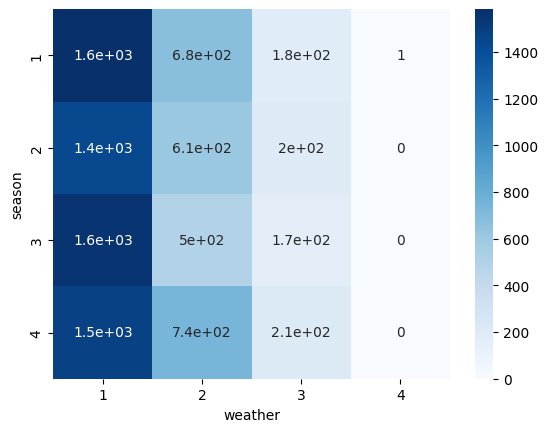

In [79]:
sns.heatmap(pd.crosstab(df.season, df.weather), annot=True, cmap='Blues');

#### Insights and Analysis:
- The data indicates that weather conditions vary significantly across different seasons. This finding is supported by the statistical analysis that suggests rejecting the null hypothesis, indicating significant differences in weather patterns between seasons. For example, Season 1 (spring) has higher counts of Weather Condition 1 (Clear, Few clouds, partly cloudy) compared to other seasons, while Season 4 (winter) has higher counts of Weather Condition 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds).
- Season 1 (spring) and Season 2 (summer) show relatively higher counts of Weather Condition 1 (Clear, Few clouds, partly cloudy), indicating more favorable weather conditions during these seasons.
- Season 3 (fall) exhibits higher counts of Weather Condition 2 (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), suggesting more prevalent misty and cloudy weather during the fall season.
- Season 4 (winter) shows higher counts of Weather Condition 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds), indicating colder and potentially snowy or rainy conditions during the winter season.

#### Implications for Business and Operations:
- Company can use this information to anticipate demand fluctuations and adjust operational strategies accordingly.
- During seasons with more favorable weather conditions (e.g., spring and summer), businesses may expect higher demand for bike rentals and should ensure sufficient inventory and staffing levels to meet customer needs.
- Conversely, during seasons with less favorable weather conditions (e.g., fall and winter), businesses may need to implement promotional strategies or diversify offerings to attract customers despite potential lower demand for outdoor activities.

## Extras:
### 1. Impact of Holidays and Working days (Holidays means including Weekends and public holidays)

In [80]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,Weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1


In [81]:
df[['holiday', 'workingday']].value_counts()

holiday  workingday
0        1             6640
         0             2473
1        0              251
Name: count, dtype: int64

**From above we can understand that if workingday is 1 then it is neither weekend nor holiday. If holiday is 1 then it is public holiday and if holiday is 0 and working day is 0 then it is weekend**

So, to achieve our objective we need both 2 groups, One is Holidays + Weekends and 2nd one is working days only.

In [82]:
df_h=df[df.workingday==0]
df_w=df[df.workingday==1]

**Null Hypothesis (H0):** <br>
There is no significant difference between the number of bike rides on Working days and holidays. <br>
**Alternate Hypothesis for Two-sided (H1):** <br>
There is a significant difference between the number of bike rides on Working days and holidays. <br>
**Alternate Hypothesis for Right-Tailed (H1):** <br>
There is a significant difference between the number of bike rides on Working days and holidays. Where Working days have more number of bike rides <br>
**Alternate Hypothesis for Left-Tailed (H1):** <br>
There is a significant difference between the number of bike rides on Working days and holidays. Where holidays have more number of bike rides <br>

In [83]:
#Two sided 2 sample t-test
tstat, pvalue=ttest_ind(df_w['count'], df_h['count'])
alpha=0.05
print(pvalue)
if pvalue<=alpha:
    print('Reject null hypothesis. There is a significant difference between the number of bike rides on Working days and Holiday.')
else:
    print('Failed to Reject null hypothesis. There is no significant difference between the number of bike rides on Working days and Holiday.')

2.2552148137228035e-33
Reject null hypothesis. There is a significant difference between the number of bike rides on Working days and Holiday.


In [84]:
#Right Tailed 2 sample t-test
tstat, pvalue=ttest_ind(df_w['count'], df_h['count'], alternative="greater")
alpha=0.05
print(pvalue)
if pvalue<=alpha:
    print('Reject null hypothesis. The number of bike rides on Working days is more.')
else:
    print('Failed to Reject null hypothesis. There is no significant difference between the number of bike rides on Working days and Holiday.')

1.1276074068614017e-33
Reject null hypothesis. The number of bike rides on Working days is more.


In [85]:
#Left Tailed 2 sample t-test
tstat, pvalue=ttest_ind(df_w['count'], df_h['count'], alternative="less")
alpha=0.05
print(pvalue)
if pvalue<=alpha:
    print('Reject null hypothesis. The number of bike rides on Holidays is more.')
else:
    print('Failed to Reject null hypothesis. There is no significant difference between the number of bike rides on Working days and Holiday.')

1.0
Failed to Reject null hypothesis. There is no significant difference between the number of bike rides on Working days and Holiday.


**Conclusion:** From the above three tests, we can confirm that holidays and working days have an impact on bike rental counts, with bike rides being highest on working days.

### 2. Impact of Temperature on Bike rentals

In [86]:
df_t, df_c=df['temp'], df['count']

We can use Pearson as well as Spearman to confirm statistically whether there is any relation or not.

H0: There is no correlation <br>
H1: There is correlation <br>
Significance Level: 0.05

In [87]:
stat, pvalue=pearsonr(df_t, df_c)
print(stat, pvalue)
alpha=0.05
if pvalue<alpha:
    print('Reject H0, there is correlation')
else:
    print('Failed to Reject H0, there is no correlation')

0.3374695017452742 3.86569857908793e-248
Reject H0, there is correlation


In [88]:
stat, pvalue=spearmanr(df_t, df_c)
print(pvalue)
alpha=0.05
if pvalue<alpha:
    print('Reject H0, there is correlation')
else:
    print('Failed to Reject H0, there is no correlation')

3.7448904579225666e-244
Reject H0, there is correlation


**Conclusion:**
Temperature and the count of bike rentals have a correlation, and the correlation value is 0.34, indicating a positive linear relationship. However, this correlation is at a moderate level. This simply means that when the temperature starts to rise, so do the bike rentals. However, this relationship is mediocre.

### 3. Impact of humidity on Bike Rents

In [89]:
df_h=df['humidity']

In [90]:
stat, pvalue=pearsonr(df_h, df_c)
print(stat, pvalue)
alpha=0.05
if pvalue<alpha:
    print('Reject H0, there is correlation')
else:
    print('Failed to Reject H0, there is no correlation')

-0.2980901479157468 1.8381763407092265e-191
Reject H0, there is correlation


In [91]:
stat, pvalue=spearmanr(df_h, df_c)
print(pvalue)
alpha=0.05
if pvalue<alpha:
    print('Reject H0, there is correlation')
else:
    print('Failed to Reject H0, there is no correlation')

2.466737156002781e-217
Reject H0, there is correlation


**Conclusion:** 
Humidity and the count of bike rentals have a correlation, with a correlation value of -0.29. This indicates a negative linear relationship, albeit at a low level. It means that when humidity is high, bike rentals will drop, although the relationship is not particularly strong.

## Overall Report:
- **Weather Conditions and Bike Rentals Analysis:**
    - Temperature and feeling temperature exhibit a bimodal distribution, with peak bike rentals occurring around 20 and 30 degrees Celsius, indicating a preference for moderate temperatures.
    - Humidity levels around 60% coincide with peak bike rentals, suggesting a preference for moderate humidity.
    - Bike rentals peak during low wind speeds, although there are occasional instances of higher wind speeds affecting rentals.
    - Casual and registered users show right-skewed distributions, with occasional spikes in rentals.
    - The count of rental bikes also exhibits a heavily right-skewed distribution, with occasional extremely high rental counts skewing the overall distribution.
- **Correlation Analysis:**
    - Temperature and feeling temperature have moderate positive correlations with casual users and the count of rented bikes, indicating that warmer weather attracts more casual users and increases bike rentals.
    - Humidity negatively correlates with casual users, suggesting that higher humidity deters casual users from renting bikes.
    - Feeling temperature has a weak positive correlation with registered users, implying a slight influence on their rental behavior.
    - Wind speed has a weak positive correlation with registered users, indicating a potential minor increase in rentals during higher wind speeds.
- **Weather Categories and Rental Patterns:**
    - Weather conditions significantly influence bike rental demand, with clear or partly cloudy conditions being the most favorable.
    - Weather 3 experiences lower overall demand but exhibits high outliers, suggesting sporadic spikes in demand during specific conditions.
    - Severe weather conditions in Weather 4 deter people from biking, resulting in minimal demand for bike rentals.
- **Seasonal Analysis:**
    - Spring has lower median rental counts but occasional spikes, indicating potential opportunities for targeted promotions.
    - Summer and winter show similar median counts, but winter exhibits less variability, suggesting more consistent rental patterns.
    - Fall stands out with the highest median counts and greater variability, indicating high demand and potential for maximizing rental revenue.
- **Weather Variability Across Seasons:**
    - Significant differences in weather patterns across seasons influence bike rental demand.
    - Seasons with more favorable weather conditions experience higher rental counts, while less favorable conditions may require promotional strategies to maintain customer interest.
- **Extras:**
    - Bike rentals peak on working days, indicating the influence of weekdays on rental counts.
## Recommendations:
- **Inventory Management:**
    - Utilize weather forecasts and historical rental patterns to adjust inventory levels accordingly.
    - Ensure an adequate number of bikes are available during periods of high demand, such as clear or partly cloudy conditions, while scaling back inventory during adverse weather conditions like heavy rain or snow.
- **Promotional Strategies:**
    - Offer promotions, discounts, or package deals during peak demand periods to attract more customers and increase revenue.
    - Develop targeted marketing campaigns that highlight the benefits of biking in favorable weather conditions, enticing customers to rent bikes during peak seasons.
- **Flexible Pricing Models:**
    - Implement flexible pricing models that adjust rates based on weather conditions and demand levels.
    - Offer tiered pricing structures where rental rates increase during peak demand periods and decrease during off-peak times, encouraging customers to rent bikes during less busy periods.